# 导入需要使用的包

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from sklearn.preprocessing import MinMaxScaler

import matplotlib.gridspec as gridspec

import numpy as np

font_path = 'c:\\windows\\fonts\\simsun.ttc'  

# 设置字体属性
font_prop = FontProperties(fname=font_path, size=14)

plt.rcParams['font.family'] = font_prop.get_name()

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

import warnings
warnings.filterwarnings('ignore')

# 初步探索

- 加载数据集
- 统计欺诈和非欺诈的人数
- 检查空值，空值用0填充（没有数据，即认为产生费用为0或次数为0）
- 分别统计欺诈与非欺诈为0的值，欺诈为0较多的特征进一步删除

In [2]:
# 加载数据集
df = pd.read_csv('E:\竞赛\服创赛-A08\data\A08.csv')

df.columns.tolist()

data = df

In [3]:
# 统计欺诈和非欺诈的人数
fraud_count = data['RES'].sum()
non_fraud_count = len(data) - fraud_count

fraud_count, non_fraud_count

(793, 15207)

In [4]:
# 检查每个特征列的缺失值
missing_values = data.isnull().sum()

print(missing_values)

个人编码          0
一天去两家医院的天数    0
就诊的月数         0
月就诊天数_MAX     0
月就诊天数_AVG     0
             ..
个人支付治疗费用占比    0
BZ_民政救助       0
BZ_城乡优抚       0
是否挂号          0
RES           0
Length: 82, dtype: int64


In [5]:
# 计算每个特征中包含0的个数
zero_counts = (data == 0).sum()

# 筛选出包含0的特征
zero_counts = zero_counts[zero_counts > 0]

zero_counts

一天去两家医院的天数    12840
月统筹金额_MAX         9
月统筹金额_AVG         9
月药品金额_MAX        47
月药品金额_AVG        47
              ...  
个人支付治疗费用占比    13351
BZ_民政救助       13710
BZ_城乡优抚       15991
是否挂号          11948
RES           15207
Length: 62, dtype: int64

In [6]:
# 分别统计欺诈（RES=1）和非欺诈（RES=0）中特征列含0的个数
fraud_zero_counts = (data[data['RES'] == 1] == 0).sum()
non_fraud_zero_counts = (data[data['RES'] == 0] == 0).sum()

# 筛选出包含0的特征
fraud_zero_counts = fraud_zero_counts[fraud_zero_counts > 0]
non_fraud_zero_counts = non_fraud_zero_counts[non_fraud_zero_counts > 0]

fraud_zero_counts, non_fraud_zero_counts

(一天去两家医院的天数           480
 月统筹金额_MAX              1
 月统筹金额_AVG              1
 医院_统筹金_MAX             1
 医院_统筹金_AVG             1
 住院天数_SUM             793
 统筹支付金额_SUM             1
 可用账户报销金额_SUM           1
 药品费自费金额_SUM          115
 贵重药品发生金额_SUM         195
 中成药费发生金额_SUM          94
 中草药费发生金额_SUM         447
 检查费发生金额_SUM          164
 检查费自费金额_SUM          656
 检查费申报金额_SUM          164
 贵重检查费金额_SUM          681
 治疗费自费金额_SUM          676
 手术费发生金额_SUM          786
 手术费自费金额_SUM          790
 手术费申报金额_SUM          788
 床位费发生金额_SUM          724
 床位费申报金额_SUM          726
 医用材料发生金额_SUM         188
 高价材料发生金额_SUM         776
 医用材料费自费金额_SUM        568
 成分输血申报金额_SUM         792
 其它发生金额_SUM           481
 其它申报金额_SUM           791
 一次性医用材料申报金额_SUM      231
 起付线标准金额_MAX          784
 起付标准以上自负比例金额_SUM       4
 医疗救助个人按比例负担金额_SUM    645
 最高限额以上金额_SUM         793
 基本统筹基金支付金额_SUM         4
 公务员医疗补助基金支付金额_SUM    771
 城乡救助补助金额_SUM         598
 基本个人账户支付_SUM         315
 补助审批金额_SUM           596
 医疗救助医院申请_SU

# 频率统计

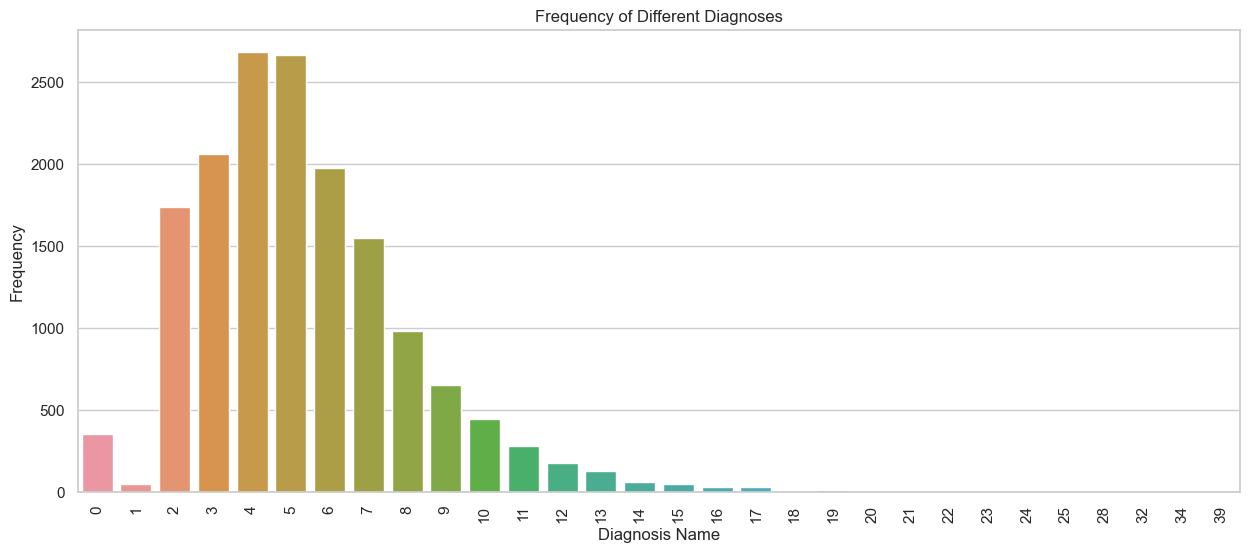

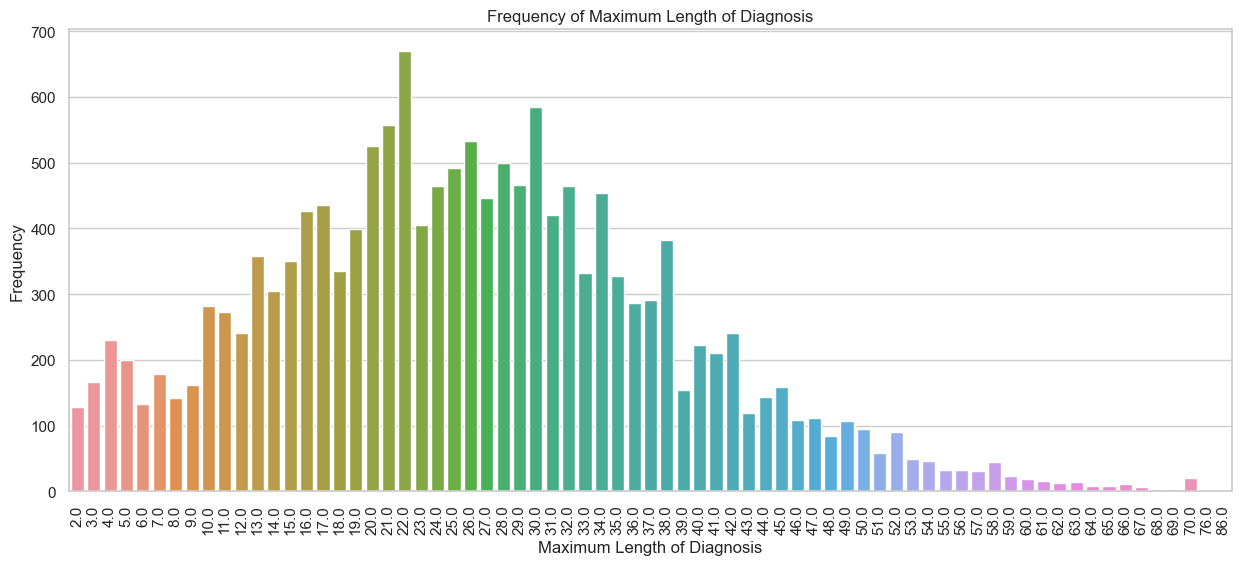

In [7]:


# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Frequency count for '出院诊断病种名称_NN'
diagnosis_freq = data['出院诊断病种名称_NN'].value_counts()

# Frequency count for '出院诊断LENTH_MAX'
length_max_freq = data['出院诊断LENTH_MAX'].value_counts()

# Plotting the frequency of '出院诊断病种名称_NN'
plt.figure(figsize=(15, 6))
sns.barplot(x=diagnosis_freq.index, y=diagnosis_freq.values)
plt.title('Frequency of Different Diagnoses')
plt.ylabel('Frequency')
plt.xlabel('Diagnosis Name')
plt.xticks(rotation=90)
plt.show()

# Plotting the frequency of '出院诊断LENTH_MAX'
plt.figure(figsize=(15, 6))
sns.barplot(x=length_max_freq.index, y=length_max_freq.values)
plt.title('Frequency of Maximum Length of Diagnosis')
plt.ylabel('Frequency')
plt.xlabel('Maximum Length of Diagnosis')
plt.xticks(rotation=90)
plt.show()

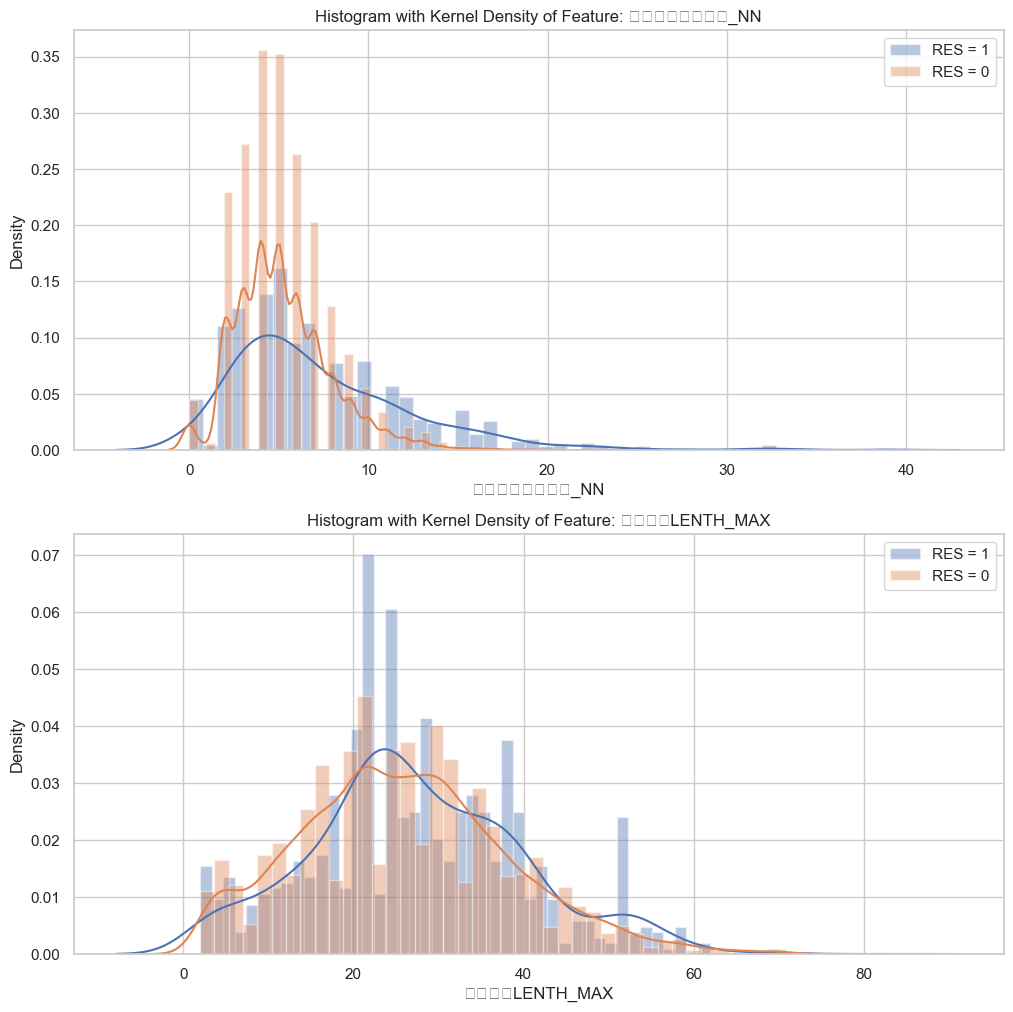

In [8]:
# Setting up the grid for plots
plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(2, 1)

# Number of bins
bins = 50

# Plotting for '出院诊断病种名称_NN'
ax1 = plt.subplot(gs[0])
sns.distplot(data['出院诊断病种名称_NN'][data['RES'] == 1], bins=bins, label='RES = 1', kde=True, hist=True)
sns.distplot(data['出院诊断病种名称_NN'][data['RES'] == 0], bins=bins, label='RES = 0', kde=True, hist=True)
ax1.set_title('Histogram with Kernel Density of Feature: 出院诊断病种名称_NN')
ax1.legend()

# Plotting for '出院诊断LENTH_MAX'
ax2 = plt.subplot(gs[1])
sns.distplot(data['出院诊断LENTH_MAX'][data['RES'] == 1], bins=bins, label='RES = 1', kde=True, hist=True)
sns.distplot(data['出院诊断LENTH_MAX'][data['RES'] == 0], bins=bins, label='RES = 0', kde=True, hist=True)
ax2.set_title('Histogram with Kernel Density of Feature: 出院诊断LENTH_MAX')
ax2.legend()

plt.show()



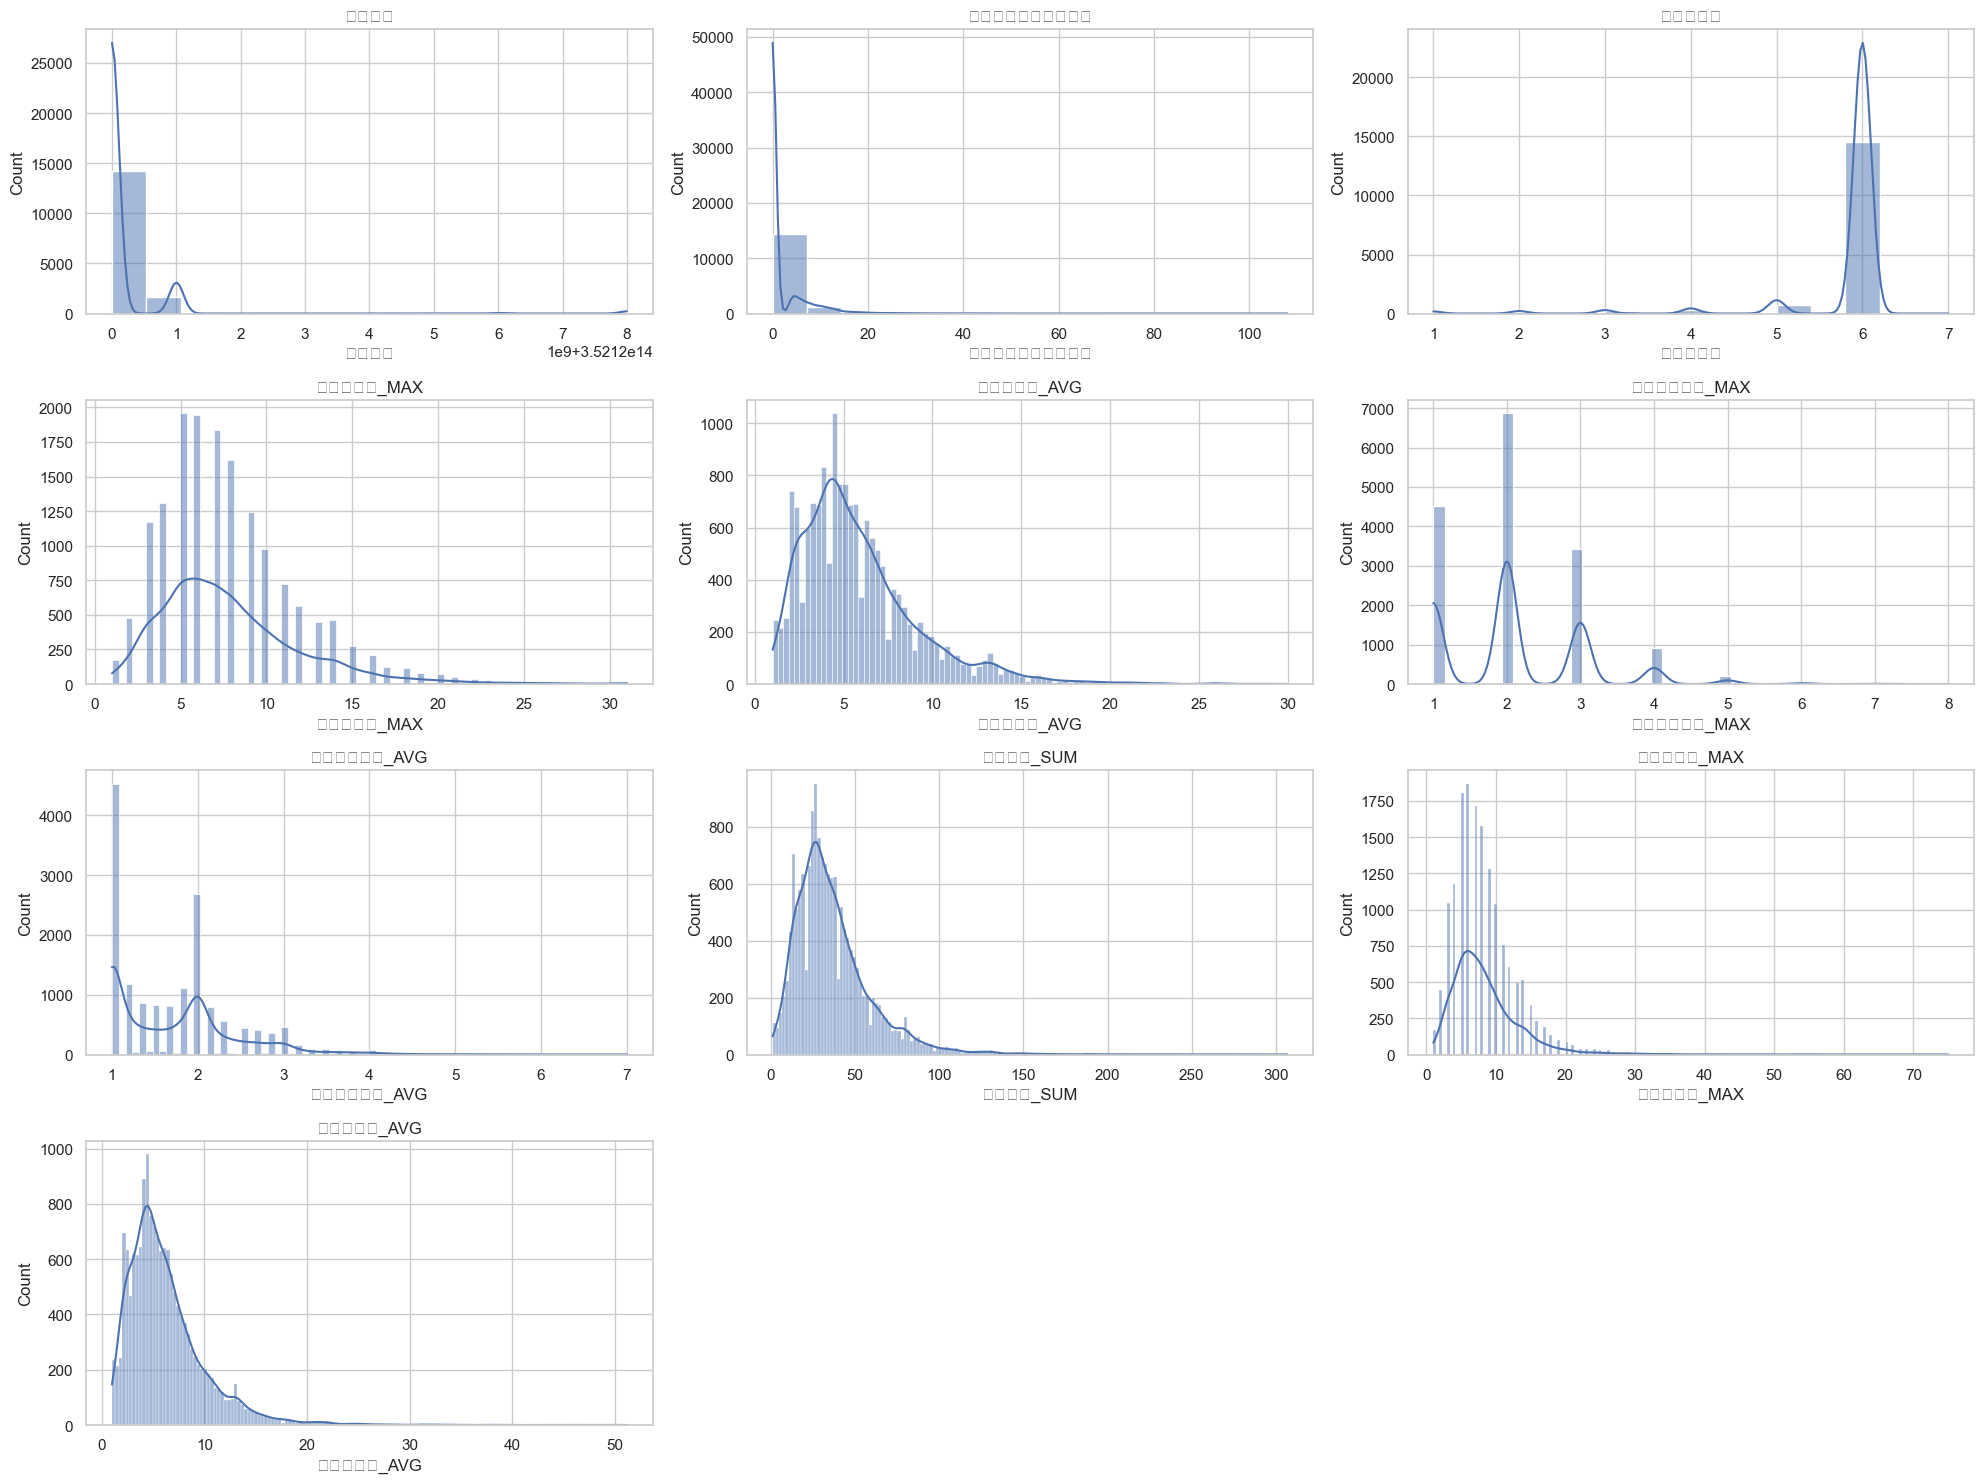

In [9]:
# 由于特征较多，选择查看一部分特征的分布情况
selected_columns = data.columns[:10]  # 选择前10个特征进行展示
plt.figure(figsize=(20, 15))

for i, column in enumerate(selected_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
    plt.tight_layout()

plt.show()

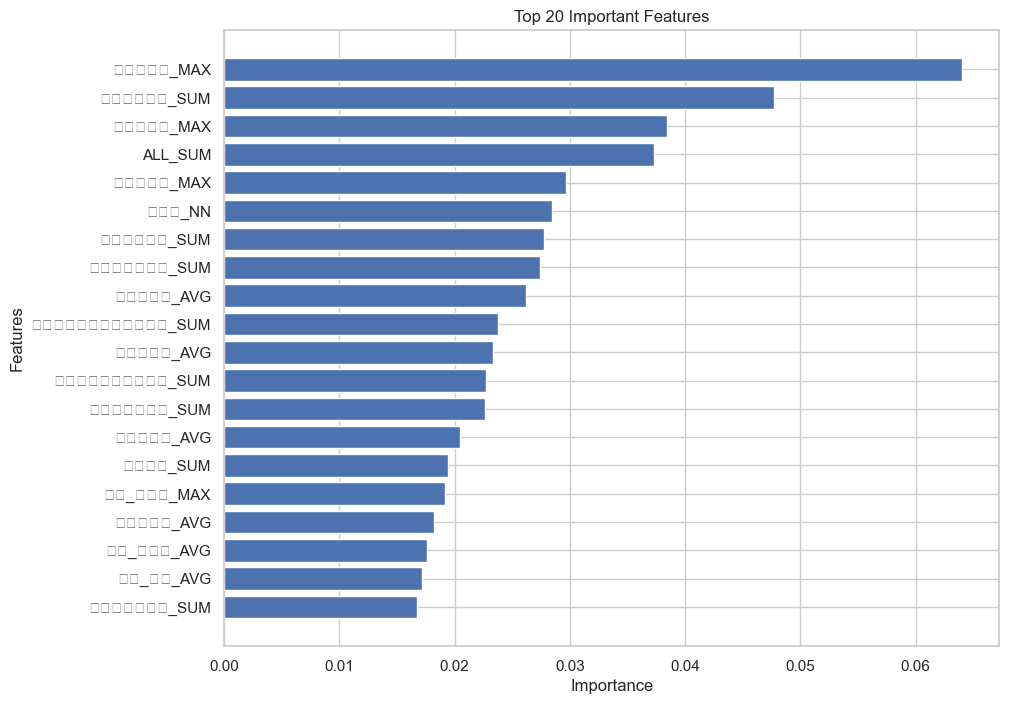

In [10]:
# 'RES'是标签列
y = df['RES']
X = df.drop('RES', axis=1)

# 处理缺失值，这里用0替换
X = X.fillna(0)

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化随机森林分类器
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 拟合模型
rf.fit(X_train, y_train)

# 获取特征重要性
importances = rf.feature_importances_

# 将特征重要性与特征名称相结合
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# 对特征重要性进行排序
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# 输出最重要的前20个特征
top20_features = feature_importances.head(20)

# 设置图形大小
plt.figure(figsize=(10,8))

# 绘制条形图
plt.barh(top20_features['feature'], top20_features['importance'])

# 设置图形的标题和标签
plt.title('Top 20 Important Features')
plt.xlabel('Importance')
plt.ylabel('Features')

# 反转y轴，保证最重要的特征在顶部
plt.gca().invert_yaxis()

# 显示图形
plt.show()



In [11]:
# Get the names of the top 20 features
top20_feature_names = top20_features.head(20)['feature'].tolist()

# Select only the top 20 features for normalization
X_top20 = X[top20_feature_names]

# Normalize the top 20 features using MinMaxScaler
scaler = MinMaxScaler()
X_top20_normalized = scaler.fit_transform(X_top20)

# Create a DataFrame for the normalized top 20 features
X_top20_normalized_df = pd.DataFrame(X_top20_normalized, columns=top20_feature_names)

# Plotting the box plots for the top 20 normalized features
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_normalized_df, orient="h")
plt.title('Box plot of Top 20 Normalized Features')
plt.show()

NameError: name 'X_normalized_df' is not defined

<Figure size 1500x1000 with 0 Axes>

In [ ]:
# Define a function to calculate the number of outliers based on IQR
def calculate_outliers(df):
    outlier_counts = {}
    for column in df:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_condition = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))
        outlier_counts[column] = outlier_condition.sum()
    return outlier_counts

# Calculate the number of outliers in the top 20 features
outliers_count = calculate_outliers(X_top20_normalized_df)
outliers_count


In [ ]:
# Define a function to calculate the match rates of outliers against the 'RES' column
def calculate_match_rates(df, features, labels):
    match_rates = {}
    for feature in features:
        # Calculating IQR
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        # Identifying outliers
        outlier_condition = (df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))
        outliers = df[feature][outlier_condition]
        # Matching outliers with 'RES' column being 1
        matches = labels[outliers.index] == 1
        # Calculating match rate
        match_rate = matches.sum() / len(outliers) if len(outliers) > 0 else 0
        match_rates[feature] = match_rate
    return match_rates

# Calculate match rates for the top 20 features
match_rates = calculate_match_rates(X_top20_normalized_df, top20_feature_names, y)

# Output the match rates
match_rates


In [ ]:

# 计算特征间的相关性
correlation_matrix = df_filled.corr()

# 找出高度相关的特征对，这里我们设定阈值为0.8
# 高相关性特征对将不包括自身（相关性为1）
highly_correlated_features = correlation_matrix.unstack()
highly_correlated_pairs = highly_correlated_features[abs(highly_correlated_features) > 0.8].sort_values(ascending=False)
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs < 1]

# 由于可能存在A与B和B与A的情况，我们需要过滤掉这些重复的配对
highly_correlated_pairs = highly_correlated_pairs.reset_index()
highly_correlated_pairs = highly_correlated_pairs.drop_duplicates(subset=['level_0', 'level_1'])
highly_correlated_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
highly_correlated_pairs = highly_correlated_pairs.loc[highly_correlated_pairs['Feature 1'] < highly_correlated_pairs['Feature 2']]

# 输出高度相关的特征对
print(highly_correlated_pairs)

# 绘制相关性矩阵的热力图
# 为了可视化方便，这里只选择部分特征进行展示
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.iloc[:10, :10], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Selected Features')
plt.show()




In [ ]:
# 仅选择数值列进行相关性分析
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 计算斯皮尔曼相关性矩阵
spearman_corr = numeric_df.corr(method='spearman')

# 设置matplotlib图形
plt.figure(figsize=(12, 10))

# 绘制热力图，设置适当的纵横比
sns.heatmap(spearman_corr, cmap='coolwarm', center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 显示图形
plt.show()

In [ ]:
# 选择数值类型的列来计算相关性
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# 计算斯皮尔曼等级相关矩阵
spearman_corr = numeric_df.corr(method='spearman')

# 排除自相关的情况（对角线上的元素）
spearman_corr.values[tuple([np.arange(spearman_corr.shape[0])] * 2)] = np.nan

# 将相关矩阵转换为长格式并排除NaN值
corr_long_df = spearman_corr.unstack().reset_index()
corr_long_df.columns = ['Feature1', 'Feature2', 'Correlation']
corr_long_df = corr_long_df.dropna(subset=['Correlation'])

# 由于每对特征会出现两次，我们需要删除重复的条目
corr_long_df['feat_pair'] = corr_long_df.apply(lambda row: frozenset([row['Feature1'], row['Feature2']]), axis=1)
corr_long_df = corr_long_df.drop_duplicates(subset=['feat_pair'])
corr_long_df = corr_long_df.drop('feat_pair', axis=1)

# 对相关性进行排序，取出前20个最高的相关性值
top_correlations = corr_long_df.reindex(corr_long_df.Correlation.abs().sort_values(ascending=False).index)
top_20_correlations = top_correlations.head(20)

print(top_20_correlations)

In [ ]:
# 找出相关性最小的前20对特征
lowest_corr_pairs = corr_long_df.nsmallest(20, 'Correlation')

print(lowest_corr_pairs)

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import random

data = df

# Function to plot the features
def plot_features():
    # Randomly select one sample with RES = 0 and one with RES = 1
    sample_res_0 = data[data['RES'] == 0].sample(1)
    sample_res_1 = data[data['RES'] == 1].sample(1)

    # Extracting the specified features for visualization
    features = ['月统筹金额_MAX',
                '月统筹金额_AVG', 
                '医院_统筹金_MAX',
                '医院_统筹金_AVG', 
                '统筹支付金额_SUM',
                '可用账户报销金额_SUM',
                #'药品费申报金额_SUM',
                #'检查费申报金额_SUM',
                #'治疗费申报金额_SUM',
                #'手术费申报金额_SUM',
                #'床位费申报金额_SUM',
                #'成分输血申报金额_SUM',
                #'其它申报金额_SUM',
                #'一次性医用材料申报金额_SUM',
                '起付标准以上自负比例金额_SUM',
                '基本统筹基金支付金额_SUM',
               ]
    sample_res_0_features = sample_res_0[features].values.flatten()
    sample_res_1_features = sample_res_1[features].values.flatten()

    # Creating a DataFrame for visualization
    df_viz = pd.DataFrame({'Features': features, 'RES 0': sample_res_0_features, 'RES 1': sample_res_1_features})
    df_viz.set_index('Features', inplace=True)

    # Plotting
    plt.figure(figsize=(10, 6))
    df_viz.plot(kind='bar', ax=plt.gca())
    plt.title('Comparison of Selected Features Between RES = 0 and RES = 1')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.legend(title='RES Value')
    plt.show()

# Creating a button for interaction
button = widgets.Button(description="随机选择")

# Event handler for the button
def on_button_clicked(b):
    clear_output(wait=True)
    display(button)
    plot_features()

button.on_click(on_button_clicked)

# Display the button
display(button)

In [12]:
!pip install jupyterlab

  Obtaining dependency information for uri-template from https://files.pythonhosted.org/packages/e7/00/3fca040d7cf8a32776d3d81a00c8ee7457e00f80c649f1e4a863c8321ae9/uri_template-1.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for webcolors>=1.11 from https://files.pythonhosted.org/packages/d5/e1/3e9013159b4cbb71df9bd7611cbf90dc2c621c8aeeb677fc41dad72f2261/webcolors-1.13-py3-none-any.whl.metadata
